# Dimensionality Reduction and Clustering with MNIST data

For this dimensionality Reduction and Clustering project I will work with the MNIST data analyzing hand-drawn numbers from 0-9. The purpose of this is to cluster them and accurately categorize them based on data with no labels.

### First I download all the packages I will be using for the project. Some for data analysis, others for visualization.

In [ ]:
#importing basic data input/math packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

#Mathplotlib inline simply plots all our graphs in real time to our notebook for easy viewing
%matplotlib inline

#importing PCA Reduction packages from SKLearn
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

#importing TSNE for dimensionality reduction and visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#importing Kmeans clustering packages
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import homogeneity_score

#importing dendogram/other graphing package
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle
import seaborn as sns


### Next I load in the data from the SKLearn Datasets

In [ ]:
#importing the MNIST data
from sklearn.datasets import fetch_mldata

#I assign a variable to be the data for easy use
mnist = fetch_mldata("MNIST original")
#I assign the bulk of the data to the X variable leaving the target out of it
X = mnist.data
#I define the target which is labeled as y
y = mnist.target

### First I am simply checking out the data to make sure it all came in correctly

In [ ]:
#print out the data
print(X)

### Again I am just looking to check out the data. There are a lot of zeros unless you go in and look at all the data. Which is what I do below. I commented it out because it prints out a huge ugly mess of data, but I checked and saw all of our data was in there using what is below.

In [ ]:
#print(*X, sep='\n')

### Next we go through and check the shape of the data to make sure it is correct with what I already know about the dataset. I then scale the data by 255 to get everything in a sort of percentage, and check to make sure it still looks good.

In [ ]:
#Print shape of data (rows, columns)
X.shape

In [70]:
#scaled data by dividing by 255
X = mnist.data/255
print(X)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [71]:
#check its shape
X.shape

(70000, 784)

# 1. Use PCA to reduce dementionality

# A. How many components did you use? Why?

There are 2 main methods to choosing the number of components to use:
1. The "Elbow Method".
2. Choosing number of components based on how much variance we want explained.

### Method 1: The "Elbow Method"

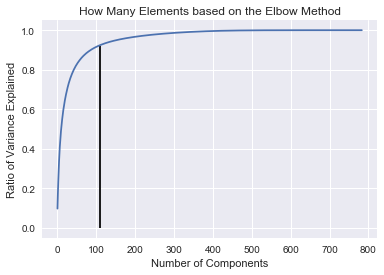

In [81]:
#From data shape above we know we have 784 variables
num_comp = 784;
#We plug our 784 variables into PCA and fit/transform our X data into this PCA.
pca = PCA(n_components=num_comp)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[105],x=110)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('How Many Elements based on the Elbow Method')

Using the "Elbow Method" we get that 110 components would be pretty good.

### Method 2: Choosing a Level of Variance

Lets look and see how many components we would need to have in order to explain 90% of our variance.

In [ ]:
index_90 = np.argmax(cum_ratio >= 0.90)
print(index_90)
print(cum_ratio[index_90])

Above we see that we should have about 85 components in order to explain 90 percent of the variance.

Next we will print our X matrix again to see how this dimensionality reduction has affected our data.

In [86]:
#Printing our 2 dimensional super reduced matrix
print(X2);

[[ 3.96272158 -1.13711224  2.25929704 ..., -0.09243312 -0.234765
  -0.05669733]
 [ 4.05317947 -1.37719095  1.9544931  ...,  0.05819061 -0.08841422
   0.11372237]
 [ 2.41343756 -0.95772665  2.4670982  ...,  0.22557239  0.2375606
  -0.02541316]
 ..., 
 [-0.5266772   2.97827952  1.21141164 ..., -0.14269787 -0.41050835
   0.11087264]
 [ 0.05182555  3.41335665  2.27286388 ..., -0.40146482 -0.08443358
   0.23342201]
 [ 1.33744774  3.76204223  1.39482604 ..., -0.28376151  0.17619594
  -0.02924724]]


Making sure our reduced matrix is the right shape still

In [85]:
#print our matrix dimensions
X2.shape

(70000, 87)

I think I will use our "Elbow Method" and choose 110 components.

# B. Plot the first two components. Do you notice any trends? What is this plot showing us?

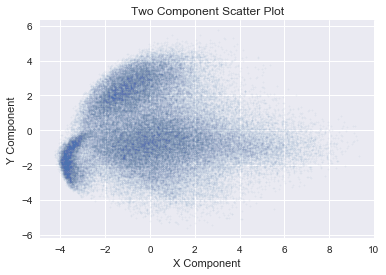

In [99]:
#Printing a scatter plot of the x2 data
plt.scatter(X2[:, 0], X2[:, 1], s=2, alpha=.05)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Two-Component Scatter Plot')

This scatter plot doesn't help much. It's still super hard to understand what relationships there are. This is probably because we have reduce the dimensionality so steeply.

# C. Why would you use PCA? What is it doing? And what are the drawbacks?

- We use PCA to reduce dimensionality while not losing as much information in our data. It projects our data onto the axes with the highest variance. 

- For example, the first component  is the axis that preserves the most variance. The second component preserves the next most variance, so we can reduce dimensionality without losing as much information.

- Some drawbacks of PCA are that you can't have more axes than features which limits the amount of reduction you can do. Another drawback is that it relies on transforming the data according to assumptions that the data behaves linearly.

# D. Plot some of the images, then compress them using PCA and plot again. How does it look?

### Below I plot an "8" and a "9". In order to use the imshow call I need to reshape them from a 784 square to a 28x28 image.

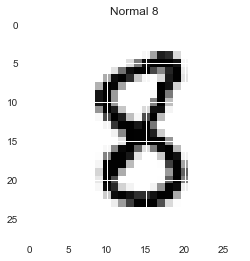

In [147]:
#Plotting an "8"
plt.imshow(X[48403].reshape((28,28)))

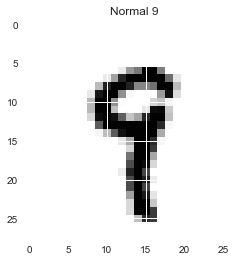

In [146]:
#Plotting a "9"
plt.imshow(X[69956].reshape((28,28)))

### Next I'm going to compress the images using PCA dimensionality reduction, then show them again.

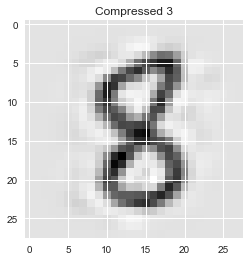

In [148]:
#Compressing the "8" and "9" using PCA keeping .9 of the variance
pca =PCA(n_components=.90)
X2 = pca.fit_transform(X)
#Making both a compressed and a normal version of image
x_normal = pca.inverse_transform(X2)

#Plotting the compressed image
plt.imshow(x_normal[48403].reshape((28,28))) 

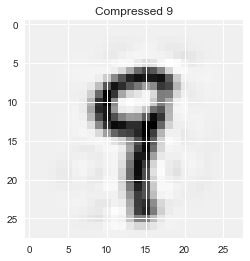

In [149]:
#Plotting the compressed image
plt.imshow(x_normal[69956].reshape((28,28))); 

After I compressed the images they are a bit distored. That is to be expected. This is because of the reduced dimensions.

# 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

## A. How does this plot differ from your PCA plot?

The plot can be found at the bottom of this section of the Notebook and the differences in the two plots are monumental. In the first plot you couldn't even interpret the graph as it appeared points were scattered every which direction. In the T-SNE graph we can see clusters form and which are numbers the model struggles with such as diferentiating 9 and 4.

## B. How robust is it to changes in perplexity?

when changing perplexity the changes were robust. The graph would completely change its shape. 

In [152]:
## first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=87)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#run TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.503625
[t-SNE] KL divergence after 50 iterations with early exaggeration: 2.276844
[t-SNE] Error after 225 iterations: 2.276844


In [153]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

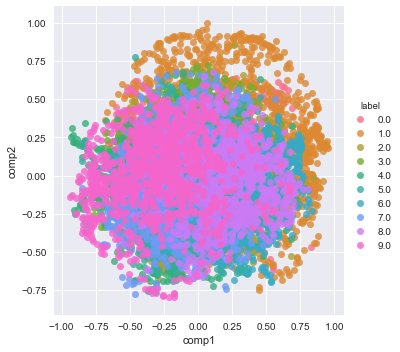

In [154]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [155]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.896628
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.518489
[t-SNE] Error after 250 iterations: 1.518489


In [156]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

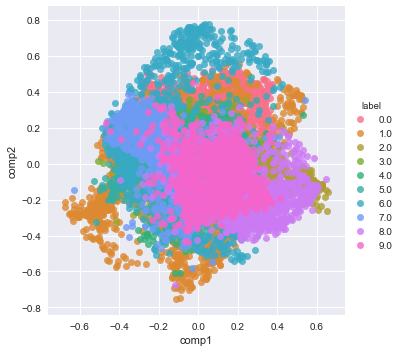

In [157]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

# C. How robust is it to different learning rate and number of iterations?

In [158]:
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500, learning_rate=2000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.499926
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.584413
[t-SNE] Error after 125 iterations: 0.584413


In [159]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

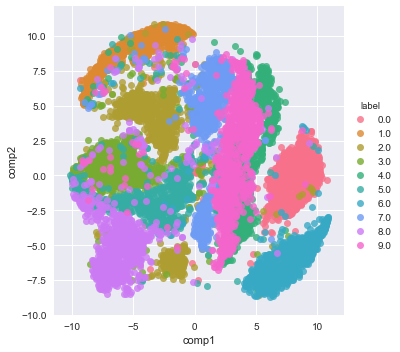

In [160]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Once again we can see that iterations and learning rate can effect the over all outcome of the t-SNE. the pick take away from making these changes is hyperparameters matter. 

In [161]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]


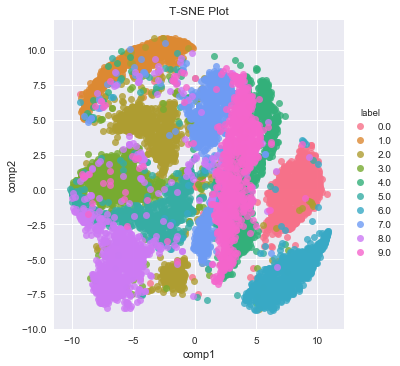

In [162]:
#plot TSNE
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.title('T-SNE Plot')

# 3. Perform k-means clustering:

### A. How did you choose k?

I use the elbow method

In [ ]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=1000, n_jobs=-1)
    kmeans.fit(X[:n_select,:])
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

Because I am aware of range of the mnist data set. I used this information to select my "K". THe mnist data set ranges from 0-9, thus I chose 10 for my "K".

In [163]:
#n_clusters is set to 10 because there are 10 numbers (0-9)
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=1)
kmeans.fit(X[:n_select,:])
sk_clusters = kmeans.predict(X[:n_select])

### B. How did you evaluate your clustering?

I validated my cluster by using the silhoute_score from sklearn.metrics.

In [164]:
from sklearn.metrics import silhouette_score
#validate the kmeans cluster
kmeans_model = KMeans(n_clusters=10, n_init=100, n_jobs=1).fit(X[:n_select,:])
labels = kmeans_model.labels_
silhouette_score(X[:n_select,:], labels, metric='euclidean')

0.13550348340239032

The silhoutte score is low and I will anticpate my clusters to be poorly seperated. 

In [57]:
df_tsne['sk_clusters'] = sk_clusters

### C. Visualize your clusters using t-sne

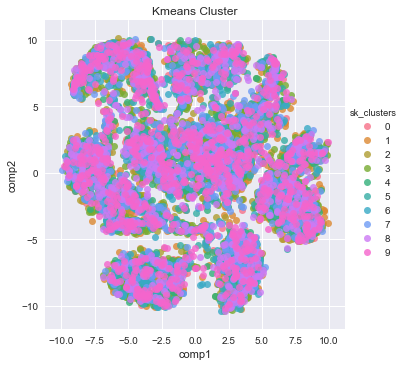

In [58]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='sk_clusters', fit_reg=False)
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.title('Kmeans Cluster')

After visualizing the data we can see that the Kmeans cluster did not do a great job as seperating the images.

### D. Did you scale your data?

Other than my original scaling of the data (when I divided it by 255) I didn't scale any of my data.

### E. How robust is your clustering?

My clustering isn't very robust. A lot of the numbers are overlaying eachother and I doubt we can gather much useful info from this.

# 4. Perform hierarchical clustering:

### A. Plot your dendrogram

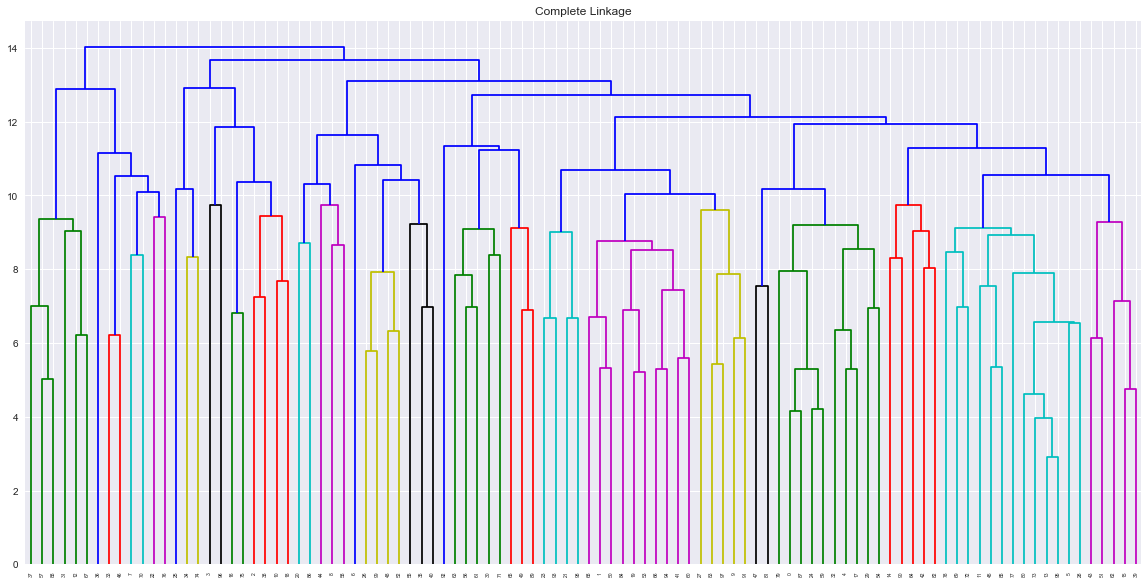

In [59]:
#plotting the dendogram
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'complete')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Complete Linkage')

I took a sample of the data, because when I tried to plot all 70,000 the graph was impossible to read. In my sample though I was sure to shuffle the data so that I wouldn't get the first 100 images.  

# B. How many clusters seem reasonable based off your graph?

Based on the dendogram it appears that 8 clusters would be reasonable when looking at this graph.

# C. How does your dendrogram change with different linkage methods?

I will plot dendograms with different linkage to see the differances if there are any.

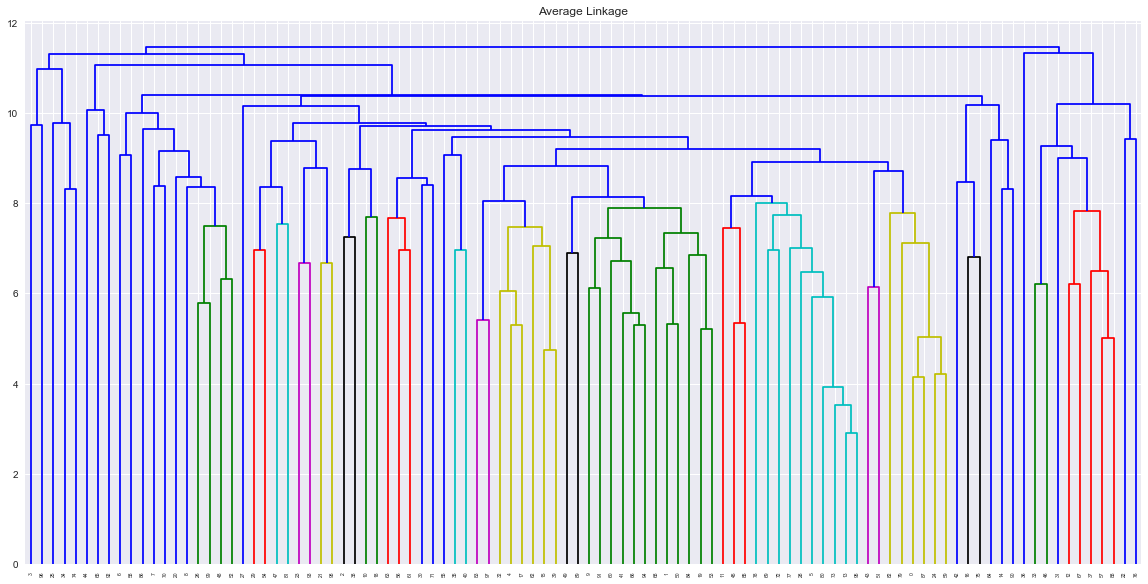

In [60]:
#using average
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'average')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Average Linkage')

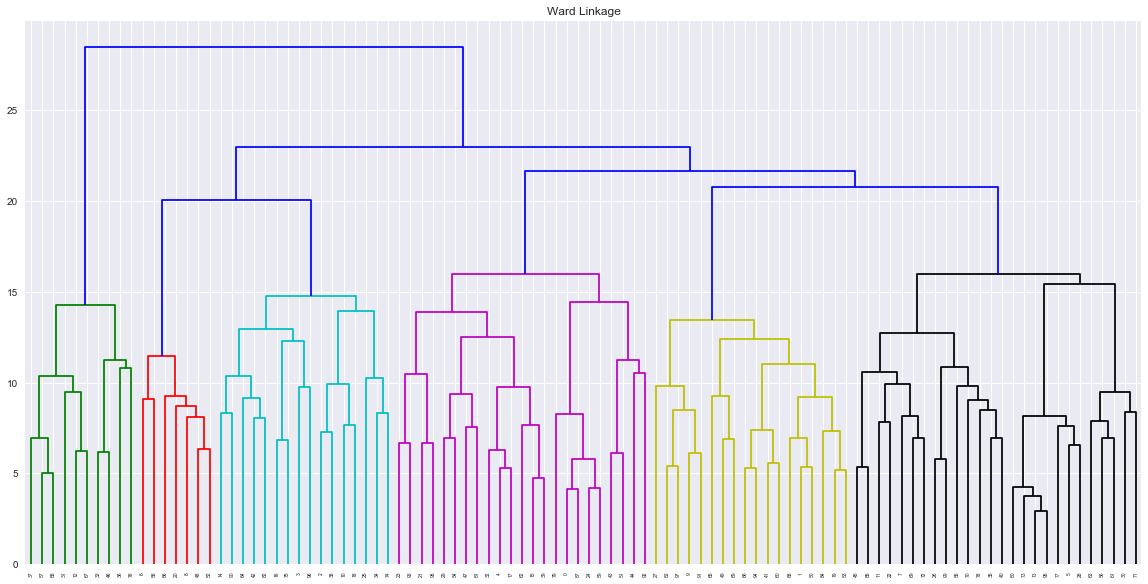

In [61]:
#using ward
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'ward')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Ward Linkage')

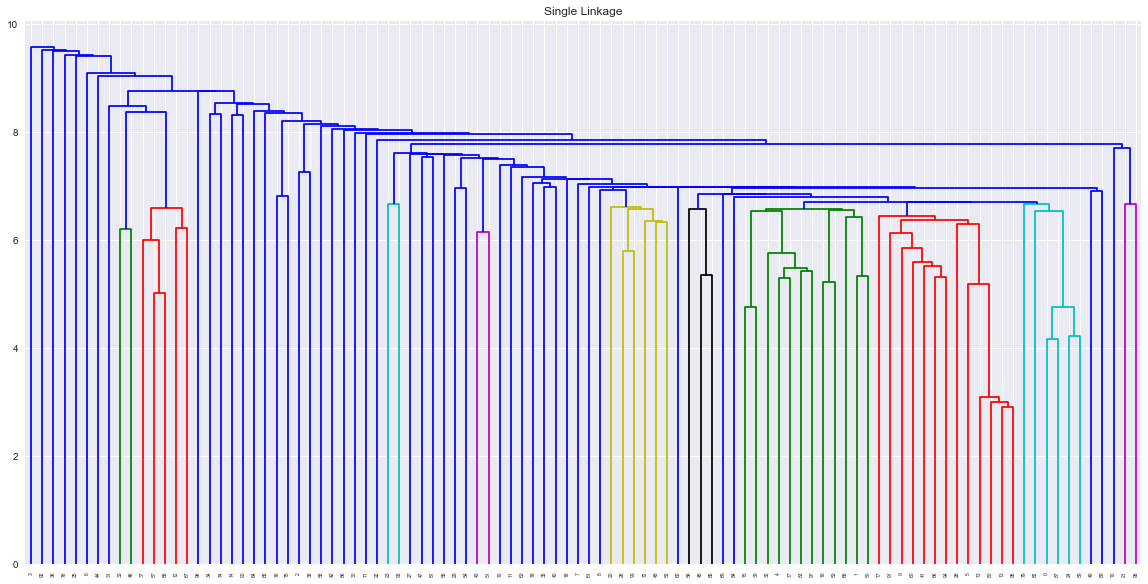

In [62]:
#using single
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'single')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Single Linkage')

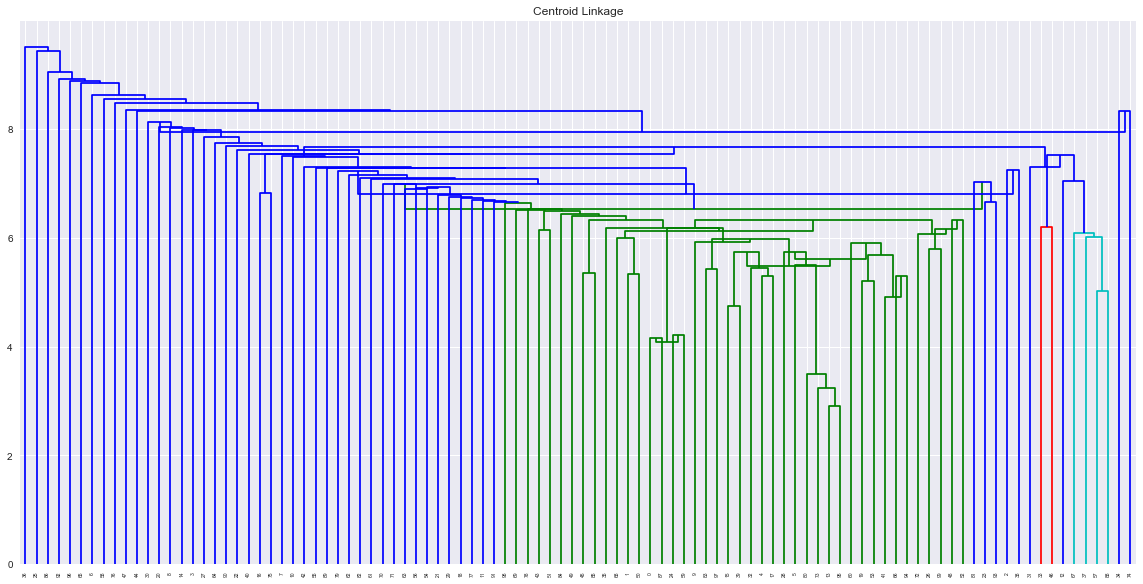

In [63]:
#using centroid
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'centroid')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Centroid Linkage')

Based on the 5 different linkages the dendograms vary greatly. Out of the 5 dendograms "Ward" was the most sucessful linkage method. 